<a href="https://colab.research.google.com/github/John-Curcio/recommender-systems/blob/master/workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you're reading this, great! You've got all you need for the recommender systems workshop.

This is a Jupyter notebook, which is a bunch of code "cells" which you can run interactively as if from a terminal. You can run cells by clicking that play-button-looking thing to the left of each cell, or just clicking Ctrl+Enter (on a PC).

Note that memory persists between cells, and cells can be run in any order.

In [0]:
# command line command for starting from scratch, in case you want to start over
!rm -rf recommender-systems 
# command line command to update tensorflow and keras libraries
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install tensorflow --upgrade 
!pip install keras --upgrade

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.16.2)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.24.2)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.13.1)
Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# command line command to fetch the dataset from a public GitHub repository, puts it in the folder 'recommender-systems'
!git clone https://github.com/John-Curcio/recommender-systems

Cloning into 'recommender-systems'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 2), reused 21 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [0]:
import os

print(os.listdir())
print(os.listdir("recommender-systems"))
print(os.listdir("recommender-systems/netflix-sub"))

['.config', 'recommender-systems', 'sample_data']
['.git', 'netflix-sub', 'README.md']
['README', 'movie_titles.txt', 'TrainingRatings.txt', 'TestingRatings.txt', 'description.txt']


In [0]:
# import the data, format it nicely, do some cleaning
# data is formatted without column names, and you gotta match up movie Titles 
# with MovieIds, so this lets you skip that headache
titles_df = pd.read_csv("recommender-systems/netflix-sub/movie_titles.txt", 
                        names=["MovieID", "YearOfRelease", "Title"], 
                        encoding="latin")
# When we're training our model, using the entire dataset leads to RAM issues with Colab
# So we take a subset of the movie titles
titles_df = titles_df.sample(frac=0.6, random_state=0) 

train_df = pd.read_csv("recommender-systems/netflix-sub/TrainingRatings.txt", 
                       names=["MovieID", "UserID", "Rating"], 
                       encoding="latin")
train_df = pd.merge(train_df, titles_df, how="right", on="MovieID")

test_df = pd.read_csv("recommender-systems/netflix-sub/TestingRatings.txt", 
                      names=["MovieID", "UserID", "Rating"], 
                      encoding="latin")
test_df = pd.merge(test_df, titles_df, how="right", on="MovieID")

# Dropping rows that have missing values for MovieID, UserID, or Rating
# They are conceivably useful, but that's beyond the scope of this workshop
train_df.dropna(how="any", inplace=True) 
test_df.dropna(how="any", inplace=True) 

In [0]:
print(train_df.shape)
train_df.head()

(2018753, 5)


,MovieID,UserID,Rating,YearOfRelease,Title
0,8,1744889.0,1.0,2004.0,What the #$*! Do We Know!?
1,8,1395430.0,2.0,2004.0,What the #$*! Do We Know!?
2,8,1205593.0,4.0,2004.0,What the #$*! Do We Know!?
3,8,1488844.0,4.0,2004.0,What the #$*! Do We Know!?
4,8,1447354.0,1.0,2004.0,What the #$*! Do We Know!?


In [0]:
print(test_df.shape)
test_df.head()

(62245, 5)


,MovieID,UserID,Rating,YearOfRelease,Title
0,8,573364.0,1.0,2004.0,What the #$*! Do We Know!?
1,8,2149668.0,3.0,2004.0,What the #$*! Do We Know!?
2,8,1089184.0,3.0,2004.0,What the #$*! Do We Know!?
3,8,2465894.0,3.0,2004.0,What the #$*! Do We Know!?
4,8,534508.0,1.0,2004.0,What the #$*! Do We Know!?


It'd be kind of silly if "What the #$*! Do We Know!?" was the only movie that Netflix had in its inventory.

A Pandas DataFrame can be thought of as a dictionary of lists, all of the same length. You can access a column by feeding in its string name, and access rows like you would a list. There's a ton of additional functionality, but we'll introduce that on a need-to-know basis.

In [0]:
# Show how to index columns and rows of a dataframe

0     What the #$*! Do We Know!?
1     What the #$*! Do We Know!?
2     What the #$*! Do We Know!?
3     What the #$*! Do We Know!?
4     What the #$*! Do We Know!?
5     What the #$*! Do We Know!?
6     What the #$*! Do We Know!?
7     What the #$*! Do We Know!?
8     What the #$*! Do We Know!?
9     What the #$*! Do We Know!?
10    What the #$*! Do We Know!?
11    What the #$*! Do We Know!?
12    What the #$*! Do We Know!?
13    What the #$*! Do We Know!?
14    What the #$*! Do We Know!?
15    What the #$*! Do We Know!?
16    What the #$*! Do We Know!?
17    What the #$*! Do We Know!?
18    What the #$*! Do We Know!?
19    What the #$*! Do We Know!?
Name: Title, dtype: object

Root mean square error:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2}
$$

It's a (biased) estimator of $\sqrt{\mathbb{E} [(y - \hat{y})^2]}$, which is the standard error.

In [0]:
def rmse(y_pred, y_true):
  """
  y_pred: array-like of n predicted values
  y_true: array-like of n true values
  returns rmse
  """
  # fill me in! 
  return 0

3.5153840019061273

3.5153840019061273

In [0]:
# dumb classifier
y_pred = None # what's the simplest classifier you can think of?
rmse(y_pred, test_df["Rating"])

1.0842602869280995

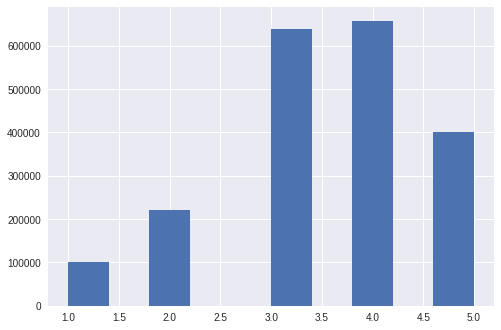

In [0]:
plt.hist(train_df["Rating"])
plt.show()

In [0]:
test_df["Rating"] - pd.Series(y_pred)

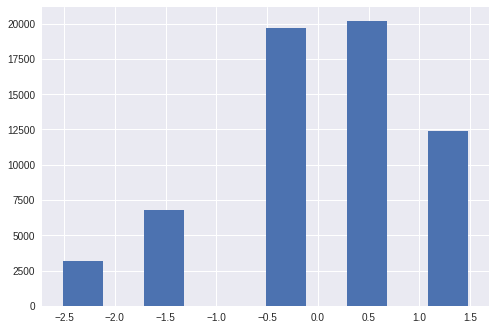

In [0]:
plt.hist(test_df["Rating"] - pd.Series(y_pred))
plt.show()

In [0]:
# VERY inefficient code to find average rating for a given movie
# godfather_rating = 0.0
# n_ratings = 0
# for i in range(len(movie_data_train)):
#   if movie_data_train["Title"][i] == "The Godfather":
#     n_ratings += 1
#     godfather_rating += movie_data_train["Rating"][i]
# godfather_rating / n_ratings

In [0]:
# more efficient! Same Big-O, obv
godfather_inds = movie_data_train["Title"] == "The Godfather" # comparing every value in the series to "The Godfather"
godfather_ratings = movie_data_train["Rating"][godfather_inds] # pandas supports boolean indexing
godfather_ratings.mean() 

In [0]:
# this is super optimized - don't need to know how to do this
mean_ratings = train_df.groupby('Title')['Rating'].mean()
mean_ratings

In [0]:
mean_ratings["The Godfather"]

4.464598134454594

In [0]:
mean_ratings["Bad Boys II"]

3.3705926481620403

In [0]:
# you can index a named pd.Series by the title name
y_pred = [mean_ratings[curr_title] for curr_title in test_df["Title"]]
rmse(y_pred, test_df["Rating"])

1.0018057530431572

Note that the RMSE got reduced only a little. In fact, the winning solution had an RMSE of $0.8567$. We should wind up with something around $0.95$ by the end of this workshop.

In [0]:
train_df["Title"].value_counts()[0:10]

Ferris Bueller's Day Off         25468
Pretty Woman                     24393
Rain Man                         23525
Seven                            23005
The Italian Job                  22565
The Incredibles                  21209
National Lampoon's Vacation      20997
Air Force One                    20902
The Godfather                    20691
Terminator 2: Extreme Edition    20646
Name: Title, dtype: int64

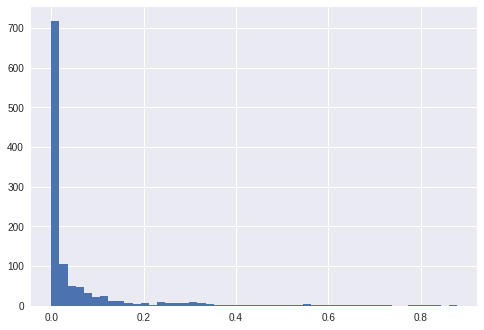

In [0]:
n_users = len(set(train_df["UserID"]))
rating_freq = train_df["Title"].value_counts() / n_users
plt.hist(rating_freq, bins=50)
plt.show()

# Math

We can think of our dataset as noisy random samples from a very large matrix $V$ of ratings. We have $n$ users, and the $m$ movies, so $V_{i,j}$ corresponds to user $i$'s rating of movie $j$.

![image_of_sparse_matrix](https://i.imgur.com/LoTi958.png)

We can think of our task here as uncovering some *latent structure* in the matrix $V$, and using that to fill in the missing values with our best guesses for the missing ratings. 

Suppose we had a feature for each movie, describing how much *romance* the movie had (we don't, but let's pretend we did). Like on a scale from *Borat* to *Gone With The Wind*, or maybe *Teenage Catgirls in Heat*. 

Some people love that sort of thing, some people find it icky. Additionally, we don't know beforehand whether a user likes romance or not. But if we had that feature, we could infer the user's preferences pretty easily - it's just a slope coefficient fit through linear regression.

Let's walk through an example (on the chalkboard, I assume).



# The Trick

So by this point in the workshop, we worked through some examples of how we'd predict ratings if we had an embedding for genre, or an embedding for user preferences, and it wound up being just linear regression. 

The trick here is to learn the embeddings through *gradient descent*.

# Gradient Descent

You'll probably learn about gradient descent in a class like 10-315 or maybe 36-402. The idea is that you want your model to minimize your loss function (in this case RMSE). The gradient of loss with respect to a certain model parameter gives you the direction of steepest ascent of the loss, and opposite that is the direction of steepest descent. So you take the gradient of your loss with respect to a certain parameter in your model and move that parameter in the opposite direction slightly. 

If the loss function is convex with respect to the parameter, and the loss function has a minimum, then this algorithm will converge to the global minimum, i.e. you'll wind up with the optimal set of parameters given your data. 

The backpropagation algorithm, which is what we use to train neural networks, is a special case of this.

![image_for_gradient_descent](http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png)

However, optimizing neural networks is a decidely non-convex problem, and it turns out that this isn't either. Gradient descent will get us to a set of parameters that is locally optimal, but possibly not globally!

# Keras

Since neural network libraries offer a lot of functionality for gradient descent and gradient descent-inspired optimizations, and since you might be interested in implementing a neural network at some point in the future, we're going to use a neural network library to build our model and fit it.

[Keras](https://keras.io/) is an open-source, high-level Python neural network library. It basically provides a nice interface between more granular libraries like [TensorFlow](https://www.tensorflow.org/), or [Theano](http://www.deeplearning.net/software/theano/). But Keras is fantastic for rapid experimentation and application.

We're going to leave the gradient descent optimization up to Keras here. 

In [0]:
from keras.layers import Input, Embedding, Reshape, Dot, Dense
from keras.models import Model
from keras import regularizers
from keras import initializers

Using TensorFlow backend.


For now, we'll just go with the romance thing - assume there's one feature and one preference.

In [0]:
n_users = len(set(train_df["UserID"]))
n_movies = len(set(train_df["MovieID"]))

In [0]:
n_movies

1150

In [0]:
##### Create model #######

# Set input layers
user_id_input = Input(shape=[1])
movie_id_input = Input(shape=[1])

# Create embedding layers for users and movies
user_embedding = Embedding(output_dim=1, # We're only learning a single 'preference'
                           input_dim=n_users, # Can have up to 28978 users who've rated a movie
                           input_length=1)(user_id_input) # Take a single user id as input

movie_embedding = Embedding(output_dim=1, # We're only learning a single 'genre'
                            input_dim=n_movies, # Can have up to 1150 movies that the user has seen
                            input_length=1)(movie_id_input) # Take a single movie ID as input

# Reshape the embedding layers for straightforward multiplication
user_embedding = Reshape([1])(user_embedding)
movie_embedding = Reshape([1])(movie_embedding)

# Compute dot-product of embedding layers for our prediction
# Since this is are scalars, this is just multiplication
output = Dot(1, normalize=False)([user_embedding, movie_embedding]) 

In [0]:
# Keras embedding layer is a little finicky with what it accepts as input
# have to use integer indices corresponding to the user and movie

# list(enumerate ([a, b, c,...])) --> [(0, a), (1, b), (2, c), ...]
user_id_mapping =  {uid:i for i, uid in enumerate(set(train_df["UserID"]))}
movie_id_mapping = {mid:i for i, mid in enumerate(set(train_df["Title"]))}

train_user_data = [user_id_mapping[uid] for uid in train_df["UserID"]]
test_user_data  = [user_id_mapping[uid] for uid in test_df["UserID"]]

train_movie_data = [movie_id_mapping[mid] for mid in train_df["Title"]]
test_movie_data  = [movie_id_mapping[mid] for mid in test_df["Title"]]


# train_user_data = train_df["UserID"].map(user_id_mapping)
# train_movie_data = train_df["Title"].map(movie_id_mapping)

# test_user_data = test_df["UserID"].map(user_id_mapping)
# test_movie_data = test_df["Title"].map(movie_id_mapping)

In [0]:
model = Model(inputs=[user_id_input, movie_id_input], outputs=output)
model.compile(loss='mse', optimizer='adam')

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 1)         28978       input_5[0][0]                    
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 1, 1)         1150        input_6[0][0]                    
__________________________________________________________________________________________________
reshape_3 

In [0]:
history = model.fit([train_user_data, train_movie_data],
                    train_df['Rating'].values,
                    batch_size=256, 
                    epochs=4,
                    shuffle=True)

Epoch 1/4
2018753/2018753 [==============================] - 11s 5us/step - loss: 7.1676
Epoch 2/4
2018753/2018753 [==============================] - 11s 5us/step - loss: 1.1855
Epoch 3/4
2018753/2018753 [==============================] - 11s 5us/step - loss: 0.9076
Epoch 4/4
2018753/2018753 [==============================] - 11s 5us/step - loss: 0.8491


In [0]:
history.history

{'loss': [7.25784668825726,
  1.1915492843820095,
  0.9082539127351261,
  0.8494874585384113]}

In [0]:
y_preds = model.predict([test_user_data, test_movie_data])

In [0]:
y_preds

array([[3.1648262],
       [2.888313 ],
       [2.7280114],
       ...,
       [2.5735118],
       [2.645785 ],
       [2.4852772]], dtype=float32)

In [0]:
rmse(y_preds.T[0], test_df["Rating"].values)

0.9222794982468498

# Another thing

We're going to subtract the mean of the movie's ratings beforehand.

In [0]:
mean_ratings = train_df.groupby('Title')['Rating'].mean()

model2 = Model(inputs=[user_id_input, movie_id_input], outputs=output)
model2.compile(loss='mse', optimizer='adam')

In [0]:
# centered_ratings = [train_df['Rating'].values[i] - mean_ratings[train_df["Title"][i]] for i in range(len(train_df))]
centered_ratings = train_df["Rating"].values - train_df["Title"].apply(lambda t: mean_ratings[t])

In [0]:
history = model2.fit([train_user_data, train_movie_data],
                    centered_ratings,
                    batch_size=256, 
                    epochs=4,
                    shuffle=True)

Epoch 1/4
2018753/2018753 [==============================] - 11s 5us/step - loss: 3.9627
Epoch 2/4
2018753/2018753 [==============================] - 11s 5us/step - loss: 0.9395
Epoch 3/4
2018753/2018753 [==============================] - 11s 5us/step - loss: 0.8295
Epoch 4/4
2018753/2018753 [==============================] - 11s 5us/step - loss: 0.7989


In [0]:
y_preds = model2.predict([test_user_data, test_movie_data])
y_preds.shape

(62245, 1)

In [0]:
rmse(y_preds.T[0] + test_df["Title"].apply(lambda t: mean_ratings[t]), test_df["Rating"].values)

0.9043630003531558

# Multidimensional Embeddings

Previously, we only had one genre, and one preference per user. We can easily extend this to $k$ genres and $k$ preferences.

![wh_matrix](https://upload.wikimedia.org/wikipedia/commons/f/f9/NMF.png)

In [0]:
n_components = 4

##### Create model #######

# Set input layers
user_id_input = Input(shape=[1])
movie_id_input = Input(shape=[1])

# Create embedding layers for users and movies
user_embedding = Embedding(output_dim=n_components, # Learning preferences for several genres
                           input_dim=n_users, # Can have up to 28978 users who've rated a movie
                           # embeddings_regularizer=regularizers.l2(0.0001), 
                           input_length=1)(user_id_input) # Take a single user id as input

movie_embedding = Embedding(output_dim=n_components, # Learning several genres at once
                            input_dim=n_movies, # Can have up to 1150 movies that the user has seen
                            # embeddings_regularizer=regularizers.l2(0.0001), 
                            input_length=1)(movie_id_input) # Take a single movie ID as input

# Reshape the embedding layers for straightforward multiplication
user_embedding = Reshape([n_components])(user_embedding)
movie_embedding = Reshape([n_components])(movie_embedding)

# Compute dot-product of embedding layers for our prediction
# Since this is are scalars, this is just multiplication
output = Dot(1, normalize=False)([user_embedding, movie_embedding]) 

In [0]:
model3 = Model(inputs=[user_id_input, movie_id_input], outputs=output)
model3.compile(loss='mse', optimizer='adam')

In [0]:
history = model3.fit([train_user_data, train_movie_data],
                    centered_ratings,
                    batch_size=256, 
                    epochs=4,
                    shuffle=True)

Epoch 1/4
2018753/2018753 [==============================] - 25s 12us/step - loss: 0.8802
Epoch 2/4
2018753/2018753 [==============================] - 24s 12us/step - loss: 0.7606
Epoch 3/4
2018753/2018753 [==============================] - 24s 12us/step - loss: 0.7362
Epoch 4/4
2018753/2018753 [==============================] - 25s 12us/step - loss: 0.7210


In [0]:
y_preds = model3.predict([test_user_data, test_movie_data])
y_preds.shape

(62245, 1)

In [0]:
rmse(y_preds.T[0] + test_df["Title"].apply(lambda t: mean_ratings[t]), test_df["Rating"].values)

0.8681086605383198